<a href="https://colab.research.google.com/github/abdelfatah2000/ML-Projects/blob/main/Regression/Used_Car_Predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_url = 'https://raw.githubusercontent.com/abdelfatah2000/ML-Projects/main/Regression/used_car_train-data.csv'
test_url = 'https://raw.githubusercontent.com/abdelfatah2000/ML-Projects/main/Regression/used_car_test-data.csv'

train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [4]:
train_data = train_data.drop('Unnamed: 0', axis=1)

In [5]:
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [6]:
train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [7]:
train_data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

Drop rows that contain null values

In [8]:
train_data = train_data[train_data['Mileage'].notna()]
train_data = train_data[train_data['Engine'].notna()]
train_data = train_data[train_data['Power'].notna()]
train_data = train_data[train_data['Seats'].notna()]

Reset indexing becuase after delete null value rows

In [9]:
train_data.reset_index(drop=True, inplace=True)

#Feautre Engineering

In [10]:
for i in range(train_data.shape[0]):
  train_data.at[i, 'Company'] = train_data['Name'][i].split()[0]
  if(train_data['Mileage'][i].split()[1] == 'km/kg'):
    train_data.at[i, 'Mileage(kmpl)'] = (float(train_data['Mileage'][i].split()[0])*1.40)
  else:
    train_data.at[i, 'Mileage(kmpl)'] = float(train_data['Mileage'][i].split()[0])
  train_data.at[i, 'Engine(CC)'] = float(train_data['Engine'][i].split()[0])
  train_data.at[i, 'Power(bhp)'] = train_data['Power'][i].split()[0]

In [11]:
train_data

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(kmpl),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,37.24,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.2
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.7
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5970,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75,Maruti,28.40,1248.0,74
5971,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00,Hyundai,24.40,1120.0,71
5972,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90,Mahindra,14.00,2498.0,112
5973,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65,Maruti,18.90,998.0,67.1


We can't change **Power(bhp)** to float it has null value, example train_data['Power'][76] == null

In [12]:
for i in range(train_data.shape[0]):
  if(train_data['Power'][i].split()[0] == 'null'):
      train_data.drop(labels=[i], axis=0, inplace=True)

train_data.reset_index(drop=True, inplace=True)

In [13]:
train_data.drop(["Name"],axis=1,inplace=True)
train_data.drop(["Mileage"],axis=1,inplace=True)
train_data.drop(["Engine"],axis=1,inplace=True)
train_data.drop(["Power"],axis=1,inplace=True)
train_data.drop(["New_Price"],axis=1,inplace=True)

#Data Visualization

###Year

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


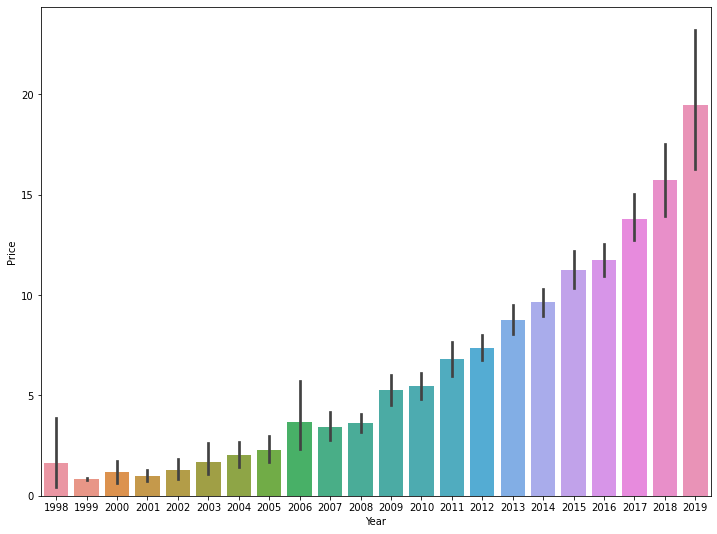

In [14]:
plt.figure(figsize=(12, 9))
sns.barplot('Year', 'Price', data=train_data)

###Fuel Type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


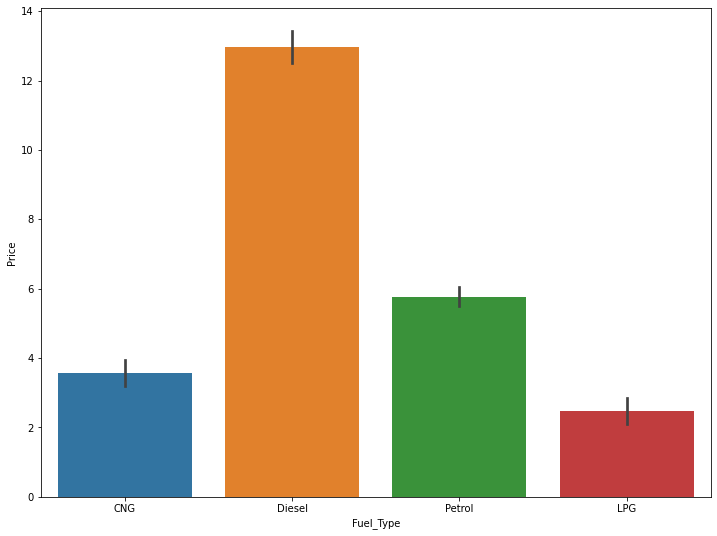

In [15]:
plt.figure(figsize=(12, 9))
sns.barplot('Fuel_Type', 'Price', data=train_data)

###Owner Type

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


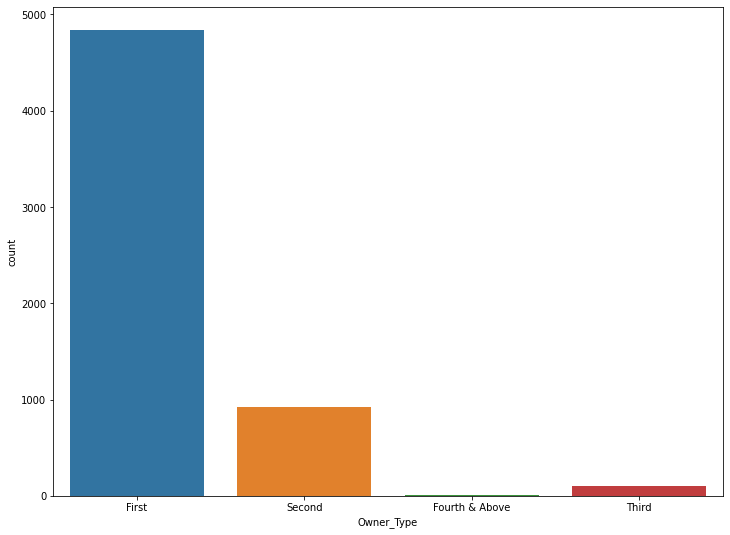

In [16]:
plt.figure(figsize=(12,9))
sns.countplot('Owner_Type', data= train_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


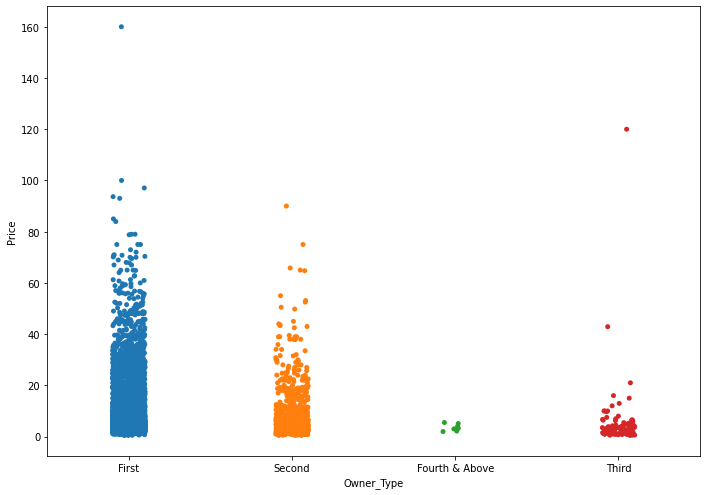

In [17]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot('Owner_Type', 'Price', data = train_data) 

###Transmission

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 2880x1440 with 0 Axes>

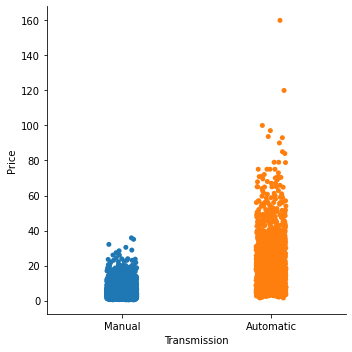

In [18]:
plt.figure(figsize=(40, 20))
sns.catplot('Transmission', 'Price', data=train_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


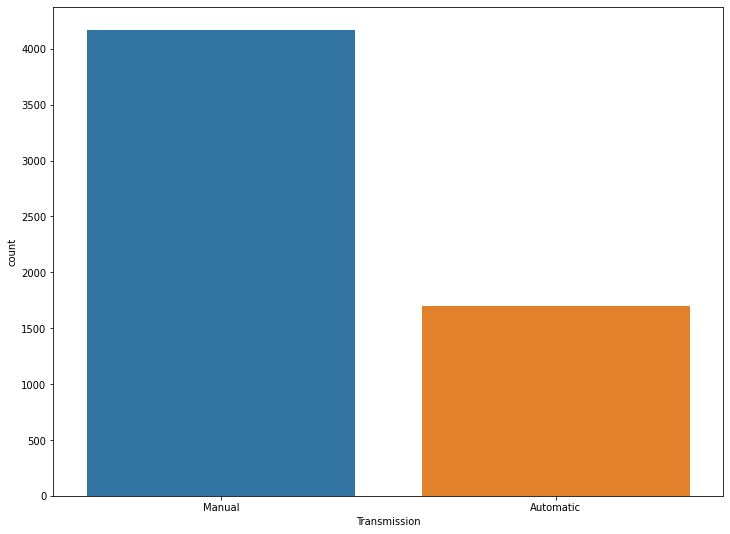

In [19]:
plt.figure(figsize=(12,9))
sns.countplot('Transmission', data=train_data)

###Location

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show(*args, **kw)>

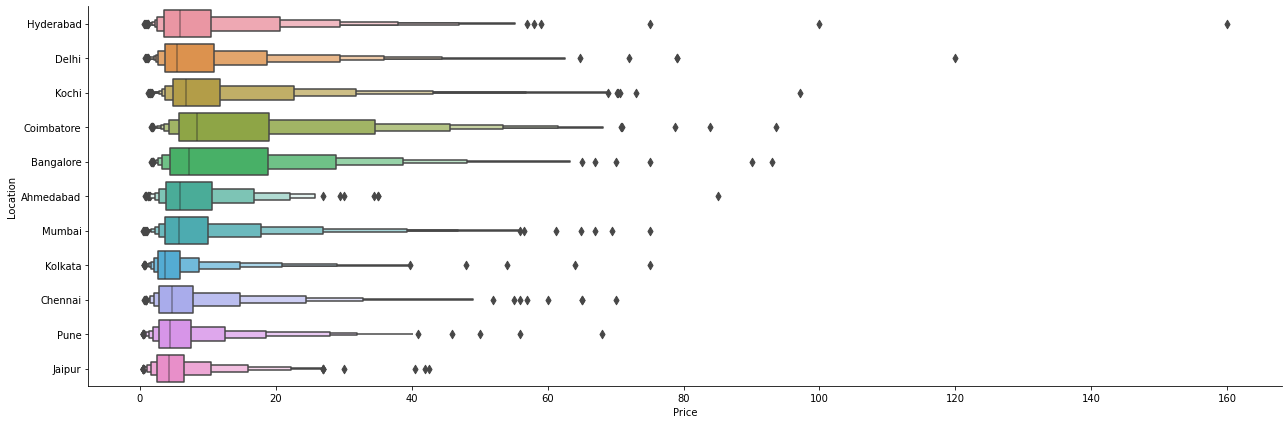

In [20]:
sns.catplot('Price','Location',data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

###Company

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


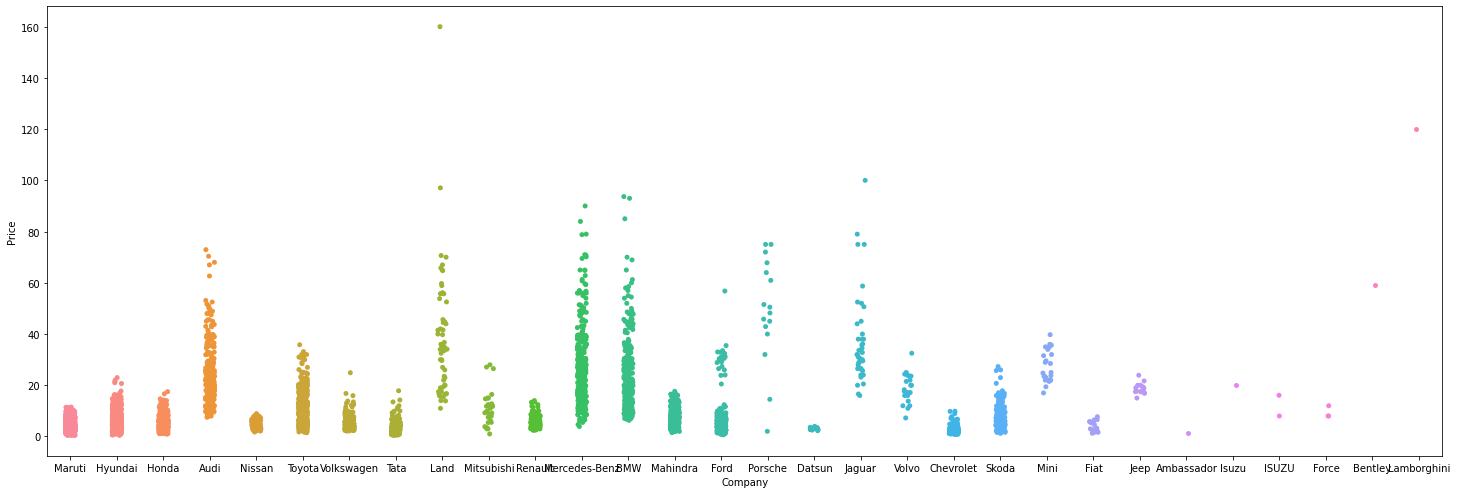

In [21]:
fig, ax = plt.subplots()
fig.set_size_inches(25, 8.27)
sns.stripplot('Company','Price', data = train_data) 

#Encoding Categorical Features

###Location

In [22]:
train_data['Location'].value_counts()

Mumbai        775
Hyderabad     718
Kochi         645
Coimbatore    629
Pune          594
Delhi         545
Kolkata       521
Chennai       476
Jaipur        402
Bangalore     347
Ahmedabad     220
Name: Location, dtype: int64

In [23]:
Location = train_data['Location']
Location = pd.get_dummies(Location, drop_first=True)
Location.head()

,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


###Transmission

In [24]:
Transmission = train_data['Transmission']
Transmission = pd.get_dummies(Transmission, drop_first=True)
Transmission.head()

,Manual
0,1
1,1
2,1
3,1
4,0


###Company

In [25]:
train_data['Company'].value_counts()

Maruti           1175
Hyundai          1058
Honda             600
Toyota            394
Mercedes-Benz     316
Volkswagen        314
Ford              294
Mahindra          268
BMW               262
Audi              235
Tata              183
Skoda             172
Renault           145
Chevrolet         120
Nissan             89
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               23
Volvo              21
Porsche            16
Jeep               15
Datsun             13
Force               3
ISUZU               2
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Company, dtype: int64

Because alot of variation we will drop it

In [27]:
train_data.drop('Company', axis=1, inplace=True)

###Fuel Type

In [30]:
Fuel = train_data['Fuel_Type']
Fuel = pd.get_dummies(Fuel, drop_first=True)
Fuel.head()

,Diesel,LPG,Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


###Owner Type

As Owner_Type is ordered data so we will use **Label Encoding**.

In [31]:
train_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(kmpl),Engine(CC),Power(bhp)
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,37.24,998.0,58.16
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,19.67,1582.0,126.2
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,18.20,1199.0,88.7
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,20.77,1248.0,88.76
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,15.20,1968.0,140.8


In [32]:
train_data = pd.concat([train_data,Fuel,Transmission,Location], axis=1)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(kmpl),Engine(CC),...,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,37.24,998.0,...,0,0,0,0,0,0,0,0,1,0
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,19.67,1582.0,...,0,0,0,0,0,0,0,0,0,1
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,18.20,1199.0,...,0,1,0,0,0,0,0,0,0,0
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,20.77,1248.0,...,0,1,0,0,0,0,0,0,0,0
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,15.20,1968.0,...,0,0,1,0,0,0,0,0,0,0


In [33]:
train_data.drop(["Location", 'Transmission', 'Fuel_Type'], axis=1, inplace=True)
train_data.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(kmpl),Engine(CC),Power(bhp),Diesel,LPG,...,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
0,2010,72000,1,5.0,1.75,37.24,998.0,58.16,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2015,41000,1,5.0,12.50,19.67,1582.0,126.2,1,0,...,0,0,0,0,0,0,0,0,0,1
2,2011,46000,1,5.0,4.50,18.20,1199.0,88.7,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,1,0,...,0,1,0,0,0,0,0,0,0,0
4,2013,40670,2,5.0,17.74,15.20,1968.0,140.8,1,0,...,0,0,1,0,0,0,0,0,0,0
